### All of Statistics | Larry Wasserman | Solutions and Code by David A. Lee
### Chapter 4: Inequalities

In [1]:
import numpy as np
from numpy.random import choice
import matplotlib.pyplot as plt
import scienceplots

1. Let $X \sim$ Exponential $(\beta)$. Find $\mathbb{P}(|X - \mu_X| \ge k \sigma_X)$ for $k > 1$. Compare this to the bound you get from Chebyshev's inequality.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
Failed to find a Ghostscript installation.  Distillation step skipped.


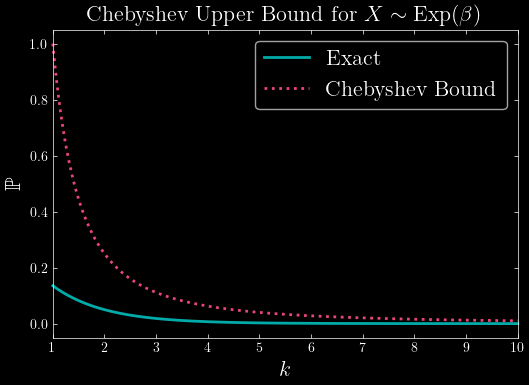

In [17]:
k = np.arange(1,10.01,0.01)
exact = np.exp(-(k+1))
chebyshev = 1 / np.square(k)

plt.figure(figsize=(6,4))
plt.style.use(['science','scatter','dark_background'])
plt.plot(k, exact, zorder=2, linewidth=2, color='#00aba9', clip_on=False, label='Exact') 
plt.plot(k, chebyshev, zorder=2, linewidth=2, linestyle='dotted', color='#e8457a', clip_on=False, label='Chebyshev Bound') 
plt.title('Chebyshev Upper Bound for $X \sim \\text{Exp}(\\beta)$', fontsize=16)
plt.xlabel('$k$', fontsize=16)
plt.ylabel('$\mathbb{P}$', fontsize=16)
plt.xlim([1, 10])
plt.minorticks_off()
plt.legend(loc= 'upper right', frameon=True, fontsize=16)

plt.savefig('chap4ex1.eps', format='eps')
plt.show()

4. Let $X_1, ..., X_n \sim$ Bernoulli $(p)$.

(a) Let $\alpha > 0$ be fixed and define
$$
    \epsilon_n = \sqrt{\frac{1}{2n} \log\left(\frac{2}{\alpha}\right)}
$$
Let $\widehat{p}_n = n^{-1} \sum^n_{i=1} X_i$. Define $C_n = (\widehat{p}_n - \epsilon_n, \widehat{p}_n + \epsilon_n)$. Use Hoeffding's inequality to show that
$$
    \mathbb{P}(C_n \text{ contains } p) \ge 1 - \alpha
$$
In practice, we truncate the interval so it does not go below 0 or above 1.

(b) (Computer Experiment.) Let's examine the properties of this confidence interval. Let $\alpha = 0.05$ and $p = 0.4$. Conduct a simulation study to see how often the interval contains $p$ (called the coverage). Do this for various values of $n$ between 1 and 10000. Plot the coverage versus $n$.

(c) Plot the length of the interval versus $n$. Suppose we want the length of the interval to be no more than $.05$. How large should $n$ be?


Failed to find a Ghostscript installation.  Distillation step skipped.


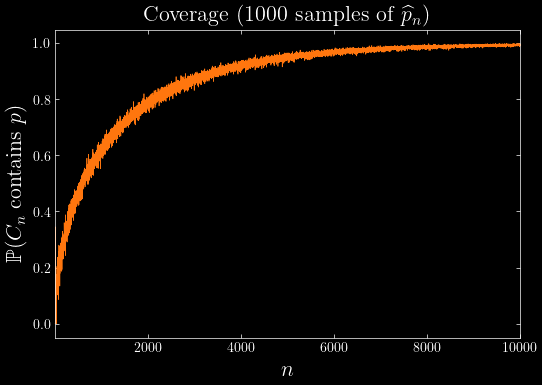

In [118]:
k, n = 1000, 10000 # number of samples, number of variables
alpha = 0.05
eps = np.sqrt((1/(2*n))*np.log(2/alpha))
p = 0.4

def confinttest(k,n): # test if p is in confidence interval; argument is k number of samples, n number of variables
    s = np.random.binomial(1,p,size=(k,n)).mean(axis=1)
    return (p > s - eps) & (p < s + eps);

def coverage():
    coverage = []
    for i in range(1,n+1):
        count = np.count_nonzero(confinttest(k,i) == True)
        coverage.append(count / k)
    return coverage;

plt.figure(figsize=(6,4))
plt.style.use(['science','scatter','dark_background'])
plt.plot(list(range(1,n+1)), coverage(), zorder=2, linewidth=0.5, color='#ff760e', clip_on=False) 
plt.title('Coverage ({} samples of $\widehat{{p}}_n$)'.format(k), fontsize=16)
plt.xlabel('$n$', fontsize=16)
plt.ylabel('$\mathbb{P}(C_n \\text{ contains } p)$', fontsize=16)
plt.xlim([1, n])
plt.minorticks_off()

plt.savefig('chap4ex4b.eps', format='eps')
plt.show()



Failed to find a Ghostscript installation.  Distillation step skipped.


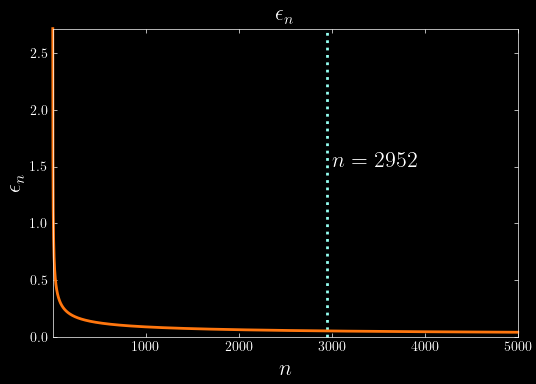

In [186]:
# plotting 2*eps versus n

def intlength(n):
    epsilons = np.empty(n)
    for i in range(1,n+1):
        epsilon = np.sqrt((1/(2*i))*np.log(2/alpha))
        epsilons[i-1] = 2*epsilon
    return epsilons;

n = 5000
nsolution = np.argwhere(intlength(n) < 0.05).min() + 1

plt.figure(figsize=(6,4))
plt.style.use(['science','scatter','dark_background'])
plt.plot(list(range(1,n+1)), intlength(n), zorder=2, linewidth=2, color='#ff760e', clip_on=False) 
plt.axvline(nsolution, color='#95fff2', linestyle='dotted', linewidth=2, zorder=1, clip_on=False)
plt.title('$\epsilon_n$', fontsize=16)
plt.text(3000, 1.5,'$n = {}$'.format(nsolution), fontsize=16)
plt.xlabel('$n$', fontsize=16)
plt.ylabel('$\epsilon_n$', fontsize=16)
plt.xlim([1, n])
plt.ylim([0,intlength(n).max()])
plt.minorticks_off()

plt.savefig('chap4ex4c.eps', format='eps')
plt.show()

6. Let $Z \sim N(0,1)$. Find $\mathbb{P}(|Z| > t)$ and plot this as a function of $t$. From Markov's inequality, we have the bound $\mathbb{P}(|Z| > t) \le \frac{\mathbb{E}|Z|^{k}}{t^k}$ for any $k > 0$. Plot these bounds for $k = 1, 2, 3, 4, 5$ and compare them to the true value of $\mathbb{P}(|Z| > t)$. Also, plot the bound from Mill's inequality.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
Failed to find a Ghostscript installation.  Distillation step skipped.


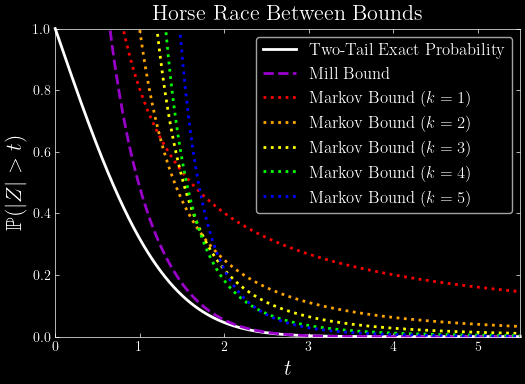

In [370]:
# P(|Z| > t) looks at the two-tailed probabilities, namely the probability that Z is > t or < -t. By symmetry of the standard normal distribution, we can calculate 2(1 - F(t)) to get this probability.

from scipy.stats import norm
import math

def normtest(t): # two-tailed probabilities, argument is threshold t for delimiting the tails
    normal_dist = norm(0,1)
    domain = np.arange(0,t+0.01,0.01)
    probs = np.empty(len(domain))
    for i, j in zip(domain, range(0, len(domain))):
        probs[j] = (2*(1-normal_dist.cdf(i)))
    return probs;

def markov(k, t): # Markov bound, argument k is power of the bound, and t for delimiting the tails
    domain = np.arange(0.01,t+0.01,0.01)
    markovs = np.empty(len(domain))
    exptabszk = np.power(np.absolute(np.random.normal(0,1,1000)), k).mean()
    for i, j in zip(domain, range(0, len(domain))):
        markovs[j] = np.divide(exptabszk, np.power(i,k))
    return markovs;

def mill(t): # Mill bound, argument t for delimiting the tails
    domain = np.arange(0.01,t+0.01,0.01)
    mills = np.empty(len(domain))
    for i, j in zip(domain, range(0, len(domain))):
        mills[j] = np.sqrt(2 / math.pi)*(np.exp(-np.square(i)/2)/i)
    return mills;

t = 5.5

plt.figure(figsize=(6,4))
plt.style.use(['science','scatter','dark_background'])
plt.plot(np.arange(0,t+0.01,0.01), normtest(t), linewidth=2, color='#FFFFFF', clip_on=False, label='Two-Tail Exact Probability') 

# Plotting Mill bound
milldomain = np.arange(0.01,t+0.01,0.01)
millbound = mill(t)
millconcat = millbound[millbound <= 1]
millindex = np.where(millbound == millconcat[0])[0][0]

plt.plot(np.arange(milldomain[millindex],t+0.01,0.01), millconcat, linestyle='dashed', linewidth=2, color='#9900c9', clip_on=False, label='Mill Bound')

# Plotting Markov bounds. All of this is to chop of the Markov bound plots where they exceed the plot limits.
# With matplotlib, it looks like we have to preprocess the data in this manner.
# If there is an easier way to do this, I want to know!

kays = [k1, k2, k3, k4, k5] = [i for i in range(1,6)]
markovs = [markov1, markov2, markov3, markov4, markov5] = [markov(i,t) for i in kays]
markovdomain = np.arange(0.01,t+0.01,0.01)
concats = [i[i <= 1] for i in markovs]
indices = [np.where(i == j[0])[0][0] for i, j in zip(markovs, concats)]
colors = ['#ff0000','#ffa500','#ffff00','#00ff00','#0000ff']

for i, j, k, l in zip(indices, concats, range(1,6), colors):
    plt.plot(np.arange(markovdomain[i],t+0.01,0.01), j, linestyle='dotted', linewidth=2, color=l, clip_on=False, label='Markov Bound ($k = {}$)'.format(k)) 

# plt.plot(np.arange(markovdomain[markovindex],t+0.01,0.01), concatenatemarkov, linestyle='dotted', linewidth=2, color='#1dcecf', clip_on=False, label='Markov Bound ($k = 1$)') 

plt.title('Horse Race Between Bounds', fontsize=16)
plt.xlabel('$t$', fontsize=16)
plt.ylabel('$\mathbb{P}(|Z| > t)$', fontsize=16)
plt.xlim([0,t])
plt.ylim([0,1])
plt.minorticks_off()
plt.legend(loc= 'upper right', frameon=True, fontsize=12)

plt.savefig('chap4ex6.eps', format='eps')
plt.show()